## Group Members: Fill in the Student IDs of each group member here

Replace the lines below to list each persons full student ID. Add lines as needed for your group size, and make sure each ID is listed on a separate line. 

**Yuanhao Zhu** A13626824

**Jinwei Ren** A92061199

**Yijie Fan** A13485989

**Bolin Yang** A92111272

**Mu He** A13361247

**Xuan Zhang** A14173638

## Import necessary libraries

In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import patsy
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import ttest_ind, chisquare, normaltest, norm

## Preprocess the data

In [13]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sample = pd.read_csv('sample_submission.csv')

In [14]:
df_sample['SalePrice'] = df_sample['SalePrice']
df_test['SalePrice'] = df_sample['SalePrice']
df = df_train.append(df_test)
df = df.set_index('Id')

Data cleaning: For this part, we don't need the columns such as Lot, Root, Basement, etc. So we drop these columns.  

In [15]:
df = df.drop(['MSSubClass','MSZoning','LotFrontage','Street','Alley', 'LotShape','LandContour','Utilities','LotConfig','LandSlope', 'BldgType', 'RoofStyle', 'RoofMatl','Exterior1st','Exterior2nd','MasVnrType', 'MasVnrArea', 'RoofStyle'], axis = 1 )


Now we create a new column called PricePerSquare which denotes the price per area. Then, we want to check if the data for PricePerSquare is normal.

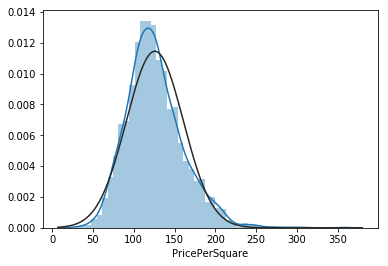

In [16]:
df['PricePerSquare'] = df['SalePrice']/df['GrLivArea']
sns.distplot(df['PricePerSquare'], fit=norm);

Since the data does not fit into normal distribution really well, we will apply log transformation to our data. 

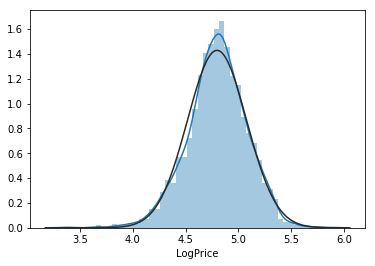

In [18]:
df['LogPrice'] = np.log(df['PricePerSquare'])
sns.distplot(df['LogPrice'], fit=norm);

## Part 1 Analysis based on housing quality and price

Our goal here is to analyze whether housing quality and housing condition have strong correlations to the housing prices. Since housing quality and housing condition are discrete integers(from 1 to 10), we use scatter plot to check if they are good predictors for the housing prices. 

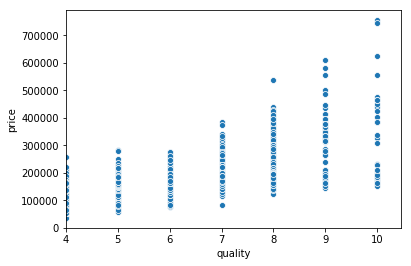

In [53]:
df_QP = pd.DataFrame()
df_QP['price'] = df['SalePrice']
df_QP['quality'] = df['OverallQual'] 
fig=sns.scatterplot(x='quality', y='price',data=df_QP) 
fig.set(xlim=(4, None))
fig.set(ylim=(4,None))
plt.show()

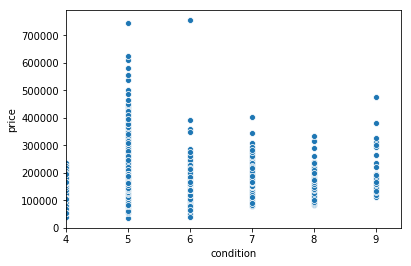

In [54]:
df_CP = pd.DataFrame()
df_CP['price'] = df['SalePrice']
df_CP['condition'] = df['OverallCond'] 
fig=sns.scatterplot(x='condition', y='price',data=df_CP) 
fig.set(xlim=(4, None))
fig.set(ylim=(4,None))
plt.show()

The first graph shows that the housing price seems to have correlation with house quality, since 

## Part 2 Analysis based on housing style and price

Our goal here is to analyze which housing style predicts a higher price. To do so, we use logisitic regression to classify and plot a graph with housing style and housing prices.

First find top 50 highest price in PricePerSquare. Then summary their neighborhood.

In [55]:
df_top = df.sort_values(['PricePerSquare'], ascending=False)[0:50]

In [56]:
df_top

,LotArea,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PricePerSquare
Id,,,,,,,,,,,,,,,,,,,,,
2099,7311,OldTown,Norm,Norm,1Story,2,5,1946,1950,TA,...,NaN,NaN,NaN,0,3,2008,WD,Abnorml,145997.635378,358.716549
2786,7830,OldTown,Norm,Norm,1Story,3,5,1921,1950,TA,...,NaN,NaN,NaN,0,6,2006,WD,Normal,152129.078861,309.205445
2872,8088,Edwards,Feedr,Norm,1Story,2,3,1922,1955,TA,...,NaN,NaN,NaN,0,2,2006,ConLD,Normal,148217.262541,297.625025
1914,10200,IDOTRR,Norm,Norm,1Story,4,6,1925,1950,TA,...,NaN,NaN,NaN,0,5,2009,WD,Normal,166271.286373,290.684067
689,8089,StoneBr,Norm,Norm,1Story,8,6,2007,2007,Gd,...,NaN,NaN,NaN,0,10,2007,New,Partial,392000.000000,276.250881
1601,8154,IDOTRR,Norm,Norm,1Story,2,5,1941,1950,TA,...,NaN,NaN,NaN,0,4,2010,ConLw,Normal,146966.230340,272.159686
1788,5400,OldTown,Artery,Norm,1Story,2,5,1940,1950,Fa,...,NaN,NaN,NaN,0,6,2009,WD,Normal,157929.594852,263.655417
899,12919,NridgHt,Norm,Norm,1Story,9,5,2009,2010,Ex,...,NaN,NaN,NaN,0,3,2010,New,Partial,611657.000000,258.738156
1586,8777,Edwards,Feedr,Norm,1Story,3,6,1945,2007,TA,...,NaN,NaN,NaN,0,4,2010,ConLD,Normal,161468.198289,252.294060


In [57]:
df_top_neighbor = df_top['Neighborhood']

In [58]:
df_top_quality = df_top['OverallQual']
df_top_condition = df_top['OverallCond']
df_top_year = df_top[['YearBuilt','PricePerSquare']]

In [59]:
df_top_neighbor.value_counts()

IDOTRR     8
OldTown    8
NridgHt    6
Sawyer     5
Edwards    4
CollgCr    3
NAmes      3
StoneBr    3
Mitchel    3
BrkSide    3
Crawfor    1
MeadowV    1
Gilbert    1
Somerst    1
Name: Neighborhood, dtype: int64

In [60]:
df_top_quality.value_counts()

5     12
4      9
3      9
2      7
9      6
8      4
10     2
1      1
Name: OverallQual, dtype: int64

In [61]:
df_top_condition.value_counts()

5    24
6     8
7     5
4     5
3     4
2     2
9     1
8     1
Name: OverallCond, dtype: int64

In [62]:
df_top_year

,YearBuilt,PricePerSquare
Id,,
2099,1946,358.716549
2786,1921,309.205445
2872,1922,297.625025
1914,1925,290.684067
689,2007,276.250881
1601,1941,272.159686
1788,1940,263.655417
899,2009,258.738156
1586,1945,252.294060


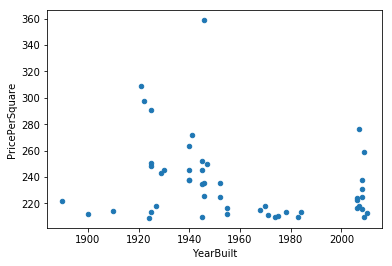

In [63]:
df_top_year.plot.scatter(x='YearBuilt', y='PricePerSquare')

In [64]:
data = df[['YearBuilt', "SalePrice"]]

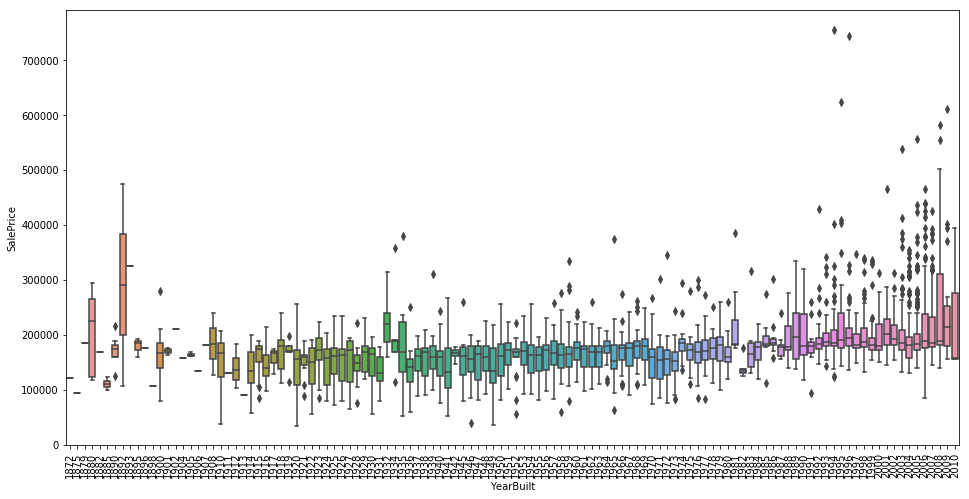

In [65]:
f, ax = plt.subplots(figsize=(16,8))
sns.boxplot(data=data, x="YearBuilt", y="SalePrice")
plt.xticks(rotation=90);